In [1]:
from geopandas import GeoDataFrame

github_url = "https://raw.githubusercontent.com/{user}/{repo}/master/{path}"

regions_fr = GeoDataFrame.from_file(
    github_url.format(
        user="gregoiredavid",
        repo="france-geojson",
        path="regions-version-simplifiee.geojson",
    )
)

In [3]:
from shapely.ops import unary_union

fr = unary_union(regions_fr.geometry)

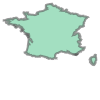

In [4]:
fr

In [5]:
from cartes.crs import Lambert93

In [8]:
import pyproj

from shapely.geometry import Point
from shapely.ops import transform

wgs84 = pyproj.CRS('EPSG:4326')
lambert93 = pyproj.CRS('EPSG:2154')

project = pyproj.Transformer.from_crs(wgs84, lambert93, always_xy=True).transform
fr_l93 = transform(project, fr)

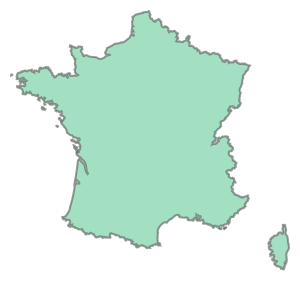

In [9]:
fr_l93

In [64]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [17]:
from shapely.geometry import box
b0 = box(x1, y1, x2, y2)
b0.intersects(fr_l93)

True

In [20]:
%load_ext lab_black

In [37]:
def tessellate(fr_l93, n):
    x1, y1, x2, y2 = fr_l93.bounds
    x = np.linspace(x1, x2, n + 1)
    y = np.linspace(y1, y2, n + 1)

    for x1_, x2_ in zip(x, x[1:]):
        for y1_, y2_ in zip(y, y[1:]):
            b = box(x1_, y1_, x2_, y2_)
            if b.intersects(fr_l93):
                yield b

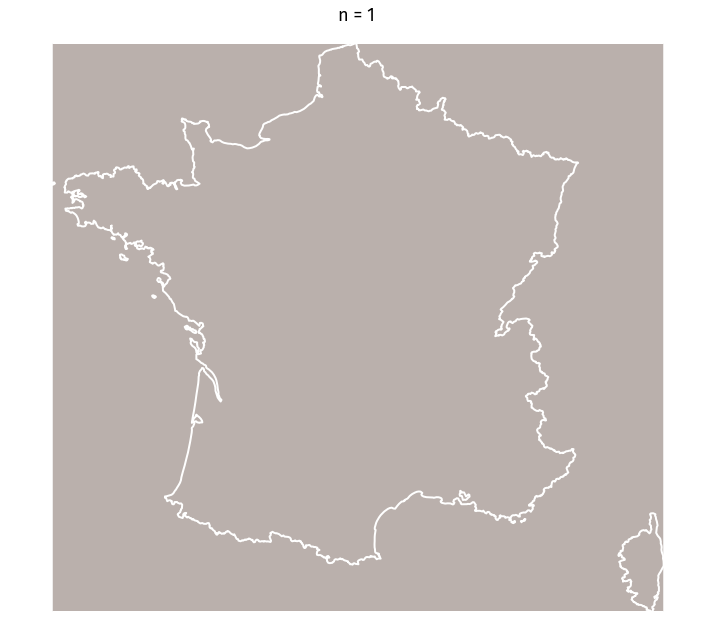

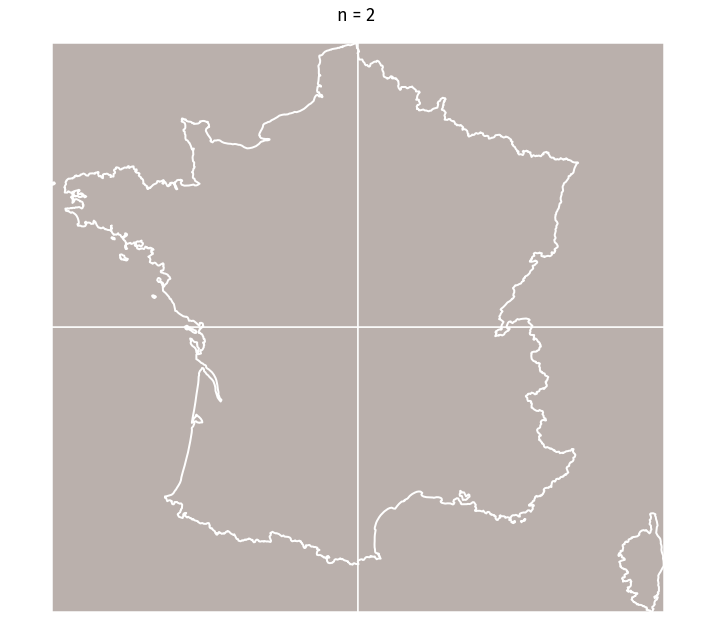

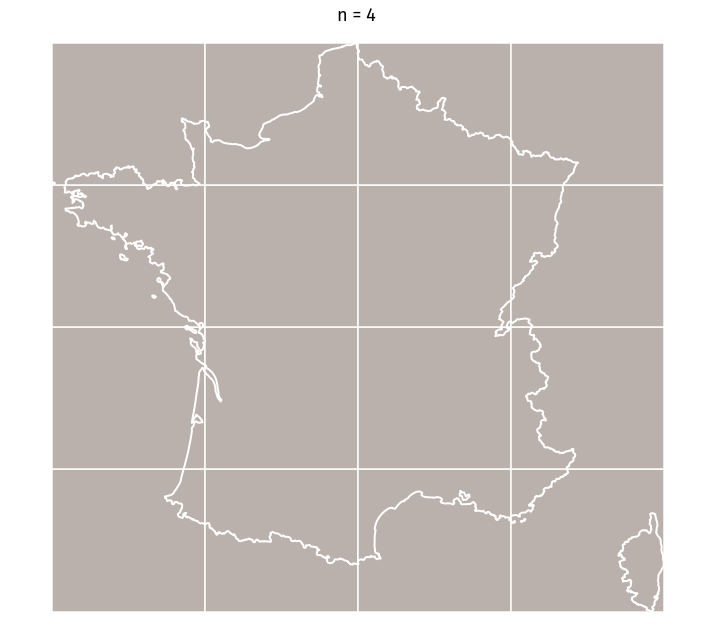

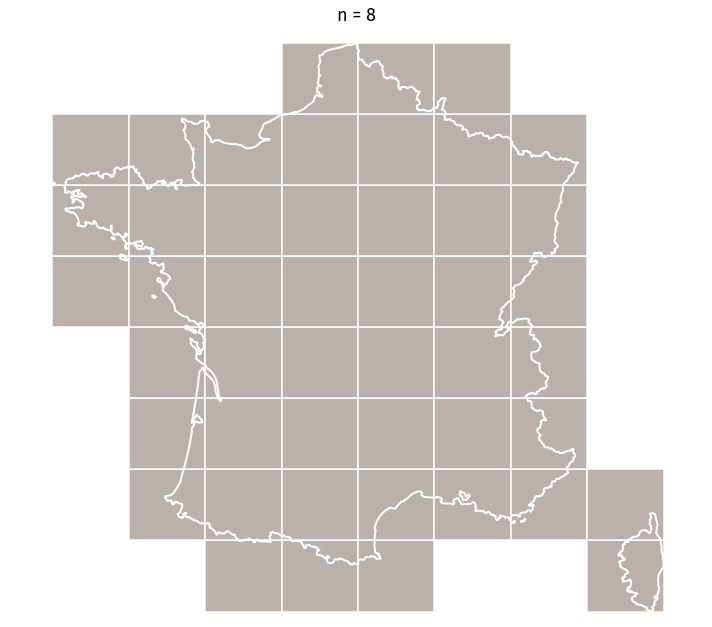

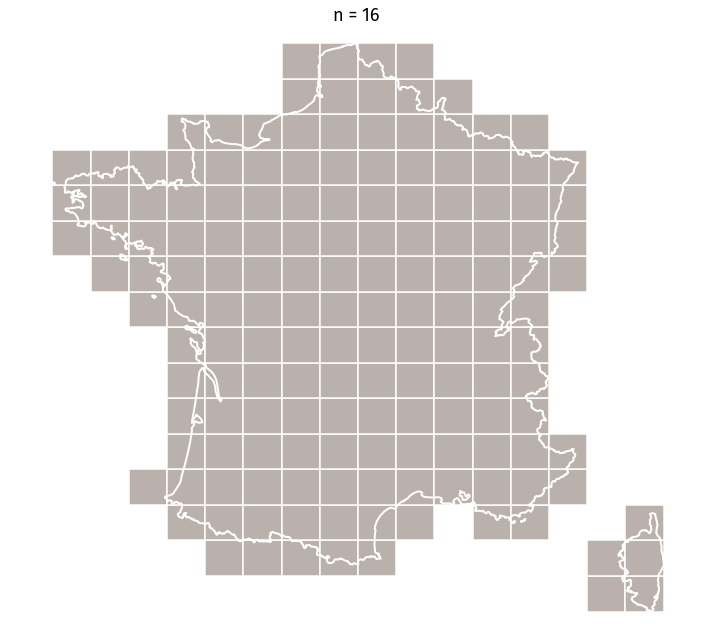

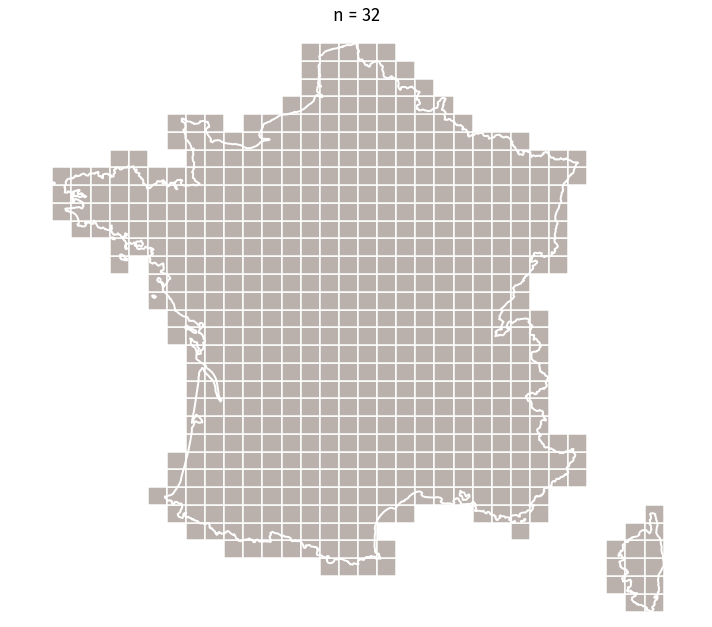

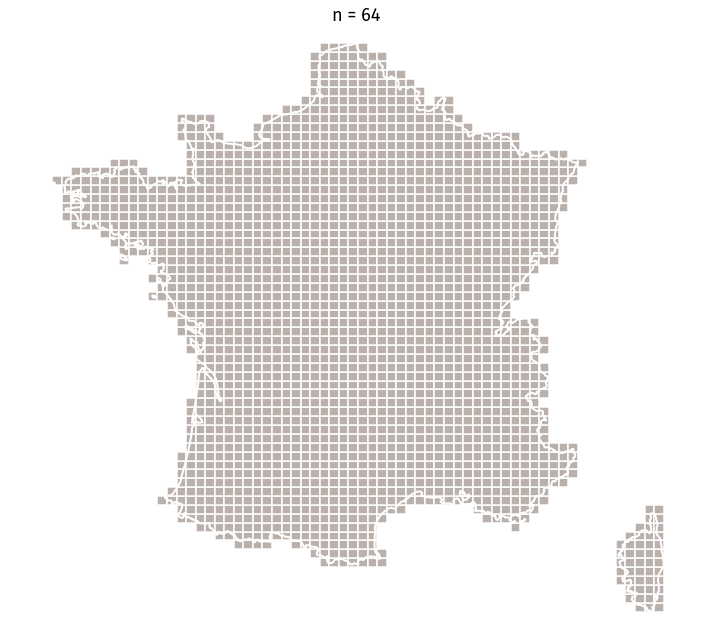

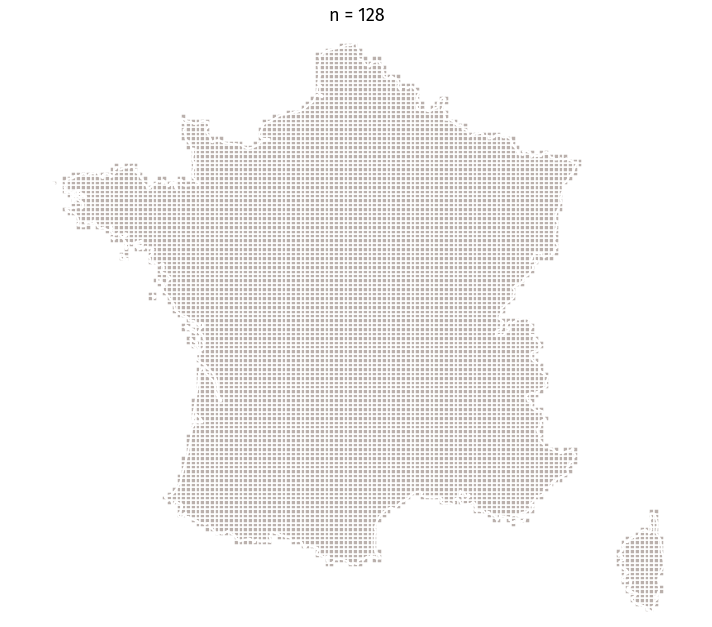

In [98]:
import matplotlib.pyplot as plt
from cartes.crs import Lambert93


for i in range(7):
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=Lambert93()))

    ax.add_geometries(
        list(tessellate(fr_l93, n=1 << i)),
        crs=Lambert93(),
        facecolor="#bab0ac",
        edgecolor="white",
        linewidth=1.5,
    )

    ax.add_geometries(
        [fr_l93],
        crs=Lambert93(),
        facecolor="None",
        edgecolor="white",
        linewidth=2,
    )

    ax.spines["geo"].set_visible(False)
    ax.set_extent((-5.11, 10.43, 40.5, 51.1))
    ax.set_title(f"n = {1<<i}", fontsize=18, fontname="Fira Sans")

    fig.tight_layout()
    fig.savefig(f"map_{i}.png", facecolor="white")

In [99]:
!convert -delay 100 -loop 0 map*.png challenge_day10.gif